In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Raw_Housing_Prices.csv")

In [3]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
data.index

RangeIndex(start=0, stop=21613, step=1)

In [5]:
data.shape

(21613, 21)

In [6]:
data.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [7]:
data['Sale Price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: Sale Price, dtype: float64

In [8]:
data['Sale Price'].sample(5)

15462    334000.0
15878    265000.0
11698    315000.0
12267    570000.0
21303    465000.0
Name: Sale Price, dtype: float64

In [9]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

## target variable has 4 missing values


#### we have to remove all missing values

### first check the data types and statistical discription of target variable

In [10]:
data['Sale Price'].dtypes

dtype('float64')

In [11]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

#### deleting missing values

In [12]:
data.dropna(subset=['Sale Price'],axis=0,inplace=True)

In [13]:
data['Sale Price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: Sale Price, dtype: float64

In [14]:
data['Sale Price'].isna().sum()

0

## treating outliers

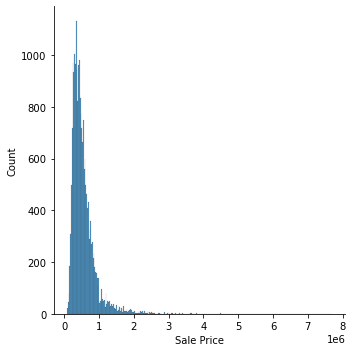

In [15]:
sns.displot(x=data['Sale Price'])

<AxesSubplot:xlabel='Sale Price', ylabel='Count'>

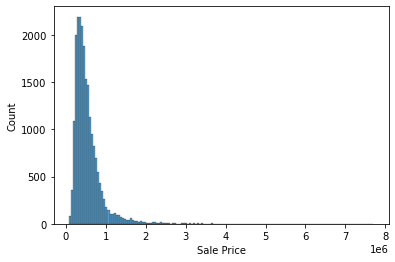

In [16]:
sns.histplot(data['Sale Price'],bins=150)

<AxesSubplot:ylabel='Sale Price'>

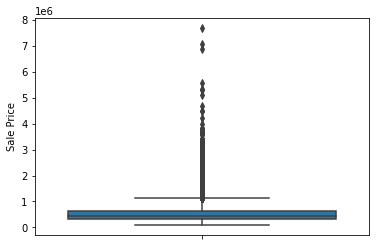

In [17]:
sns.boxplot(y=data['Sale Price'])

In [18]:
q1,q3 = data['Sale Price'].quantile([0.25,0.75])
iqr = q3-q1
lw = q1-1.5*iqr
up = q3+.5*iqr



def outliers(values):
    if values>up:
        return up
    elif values<lw:
        return lw
    else:
        return values

In [19]:
data['Sale Price'] = data['Sale Price'].apply(outliers)

<AxesSubplot:ylabel='Sale Price'>

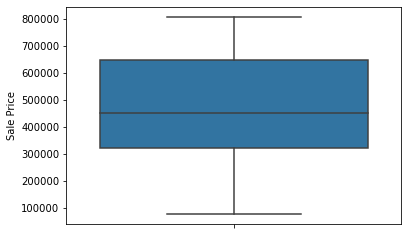

In [20]:
sns.boxplot(y=data['Sale Price'])

<AxesSubplot:xlabel='Sale Price', ylabel='Count'>

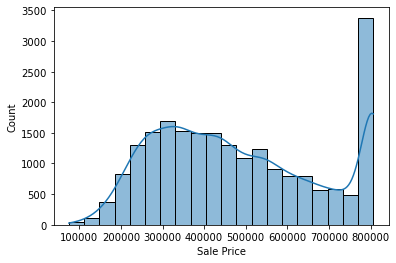

In [21]:
sns.histplot(data['Sale Price'],bins=20,kde=True)

## treating missing values in independent features

In [22]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [23]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [24]:
num = ['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
imputer = SimpleImputer(strategy='median')

In [27]:
data[num] = imputer.fit_transform(data[num])

In [28]:
data[num].isna().sum()

No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
Area of the House from Basement (in Sqft)    0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
dtype: int64

In [29]:
imputer = SimpleImputer(strategy='median')

In [30]:
data['Zipcode'] = imputer.fit_transform(data['Zipcode'].values.reshape(-1,1))

In [31]:
data['Zipcode'].isna().sum()

0

In [32]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [33]:
data['Zipcode'] = data['Zipcode'].astype(object)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [35]:
data.drop('ID',axis=1,inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date House was Sold                        21609 non-null  object 
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  object 
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [37]:
data.head(2)

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639


In [38]:
data['year'] = pd.DatetimeIndex(data['Date House was Sold']).year

In [39]:
data.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),year
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,2017
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,2017
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,2016
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,2017
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,2016


In [40]:
data['no_of_years(house sold)'] = 2022 - data['year']

In [41]:
data.sample()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),year,no_of_years(house sold)
18181,15 January 2016,262500.0,3,1.0,970.0,7854.0,1.0,No,None,Good,...,0,38,0,98056.0,47.4899,-122.185,1480.0,7800,2016,6


In [42]:
data.drop(['Date House was Sold','year'],axis=1,inplace=True)

In [43]:
data.sample()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),no_of_years(house sold)
12787,225000.0,2,1.0,720.0,4758.0,1.0,No,None,Fair,6,720.0,0,71,0,98126.0,47.5176,-122.376,990.0,4920,5


In [44]:
data['Renovated Year'].value_counts().values

array([20695,    91,    37,    36,    35,    35,    35,    26,    25,
          24,    22,    22,    22,    20,    19,    19,    19,    19,
          18,    18,    18,    18,    18,    17,    17,    17,    17,
          16,    16,    15,    15,    15,    13,    11,    11,    11,
          10,     9,     8,     8,     6,     6,     5,     5,     5,
           5,     5,     4,     4,     4,     4,     3,     3,     3,
           3,     3,     3,     3,     2,     2,     2,     2,     2,
           2,     1,     1,     1,     1,     1,     1], dtype=int64)

In [45]:
data['is_renovated'] = np.where(data['Renovated Year']!=0,1,0)

In [46]:
data.sample()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,...,Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),no_of_years(house sold),is_renovated
5371,350000.0,2,1.0,1620.0,9205.0,1.0,No,None,Excellent,6,...,770,97,0,98034.0,47.7119,-122.23,2460.0,5469,5,0


In [47]:
data['renovated_age'] = 2022 - data['Renovated Year']

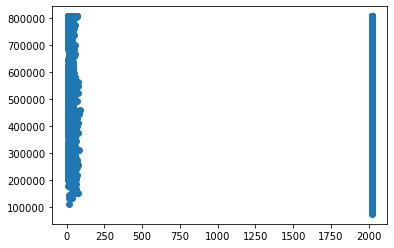

In [48]:
plt.scatter(data['renovated_age'],data['Sale Price'])

In [49]:
data.drop('renovated_age',axis=1,inplace=True)

In [50]:
data.columns

Index(['Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Waterfront View', 'No of Times Visited', 'Condition of the House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'no_of_years(house sold)',
       'is_renovated'],
      dtype='object')

In [51]:
data['Age of House (in Years)'].value_counts()

4      558
12     454
13     450
14     433
15     422
      ... 
85      30
117     29
116     27
83      24
84      21
Name: Age of House (in Years), Length: 116, dtype: int64

In [52]:
data['Age of House (in Years)'].values.max()

118

In [53]:
def house(value):
    if value<11:
        return 'New'
    elif value<51:
        return 'Middle'
    else:
        return 'Old'

In [54]:
data['house_is'] = data['Age of House (in Years)'].apply(house)

In [55]:
data.sample()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),no_of_years(house sold),is_renovated,house_is
7293,279900.0,3,2.0,1410.0,6600.0,1.0,No,None,Good,7,...,28,0,98042.0,47.3596,-122.089,1750.0,7150,6,0,Middle


<AxesSubplot:xlabel='house_is', ylabel='Sale Price'>

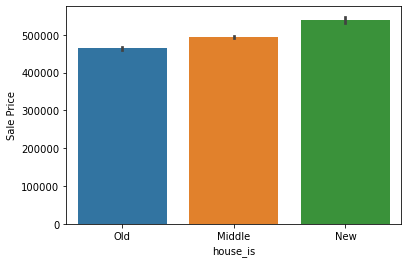

In [56]:
sns.barplot(x=data['house_is'],y=data['Sale Price'])

In [57]:
data.columns

Index(['Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Waterfront View', 'No of Times Visited', 'Condition of the House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'no_of_years(house sold)',
       'is_renovated', 'house_is'],
      dtype='object')

In [58]:
data['Overall Grade'].value_counts()

7     8979
8     6066
9     2615
6     2038
10    1623
5      242
4       29
2       13
3        3
1        1
Name: Overall Grade, dtype: int64

In [59]:
data.dtypes

Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    float64
Living Area after Renovation (in Sqft)       float64
Lot Area after Renovation (in Sqft)           

In [60]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [61]:
data = data.rename(columns={'Waterfront View':'Waterfront_View',
                           'No of Times Visited':'No_of_Times_Visited',
                           'Condition of the House':'Condition_of_the_House',
                           'Sale Price':'Sale_Price'})

In [62]:
data.columns

Index(['Sale_Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Waterfront_View', 'No_of_Times_Visited', 'Condition_of_the_House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'no_of_years(house sold)',
       'is_renovated', 'house_is'],
      dtype='object')

In [63]:
mod = ols('Sale_Price ~ Waterfront_View',data=data).fit()
sm.stats.anova_lm(mod,typ=3)

,sum_sq,df,F,PR(>F)
Intercept,5.005116e+15,1.0,130244.839805,0.000000e+00
Waterfront_View,1.082949e+13,1.0,281.808707,7.583771e-63
Residual,8.303250e+14,21607.0,NaN,NaN


In [64]:
mod = ols('Sale_Price ~ No_of_Times_Visited',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
No_of_Times_Visited,7.859129e+13,4.0,556.637878,0.0
Residual,7.625632e+14,21604.0,NaN,NaN


In [65]:
mod = ols('Sale_Price ~ Condition_of_the_House',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Condition_of_the_House,1.005858e+13,4.0,65.367171,4.765904e-55
Residual,8.310959e+14,21604.0,NaN,NaN


In [66]:
mod = ols('Sale_Price ~ Zipcode',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Zipcode,4.511245e+14,69.0,361.056187,0.0
Residual,3.900300e+14,21539.0,NaN,NaN


In [67]:
mod = ols('Sale_Price ~ house_is',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
house_is,1.042556e+13,2.0,135.576527,3.063868e-59
Residual,8.307289e+14,21606.0,NaN,NaN


In [68]:
data['Waterfront_View'].value_counts()

No     21446
Yes      163
Name: Waterfront_View, dtype: int64

In [69]:
df = data.drop('Waterfront_View',axis=1)

In [70]:
df.sample()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No_of_Times_Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),no_of_years(house sold),is_renovated,house_is
13346,375000.0,3,2.25,1330.0,8004.0,2.0,None,Fair,7,1330.0,...,33,0,98034.0,47.7098,-122.217,1300.0,7971,5,0,Middle


In [71]:
df.dtypes

Sale_Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
No_of_Times_Visited                           object
Condition_of_the_House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    float64
Living Area after Renovation (in Sqft)       float64
Lot Area after Renovation (in Sqft)            int64
no_of_years(house sold)                       

In [72]:
df['No_of_Times_Visited'].value_counts()

None      19485
Twice       963
Thrice      510
Once        332
Four        319
Name: No_of_Times_Visited, dtype: int64

In [73]:
count = {'None':0,
        'Once':1,
        'Twice':2,
        'Thrice':3,
        'Four':4}


In [74]:
df['No_of_Times_Visited'] = df['No_of_Times_Visited'].map(count)

In [75]:
df['No_of_Times_Visited'].value_counts()

0    19485
2      963
3      510
1      332
4      319
Name: No_of_Times_Visited, dtype: int64

In [76]:
df['Condition_of_the_House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition_of_the_House, dtype: int64

<AxesSubplot:xlabel='Condition_of_the_House', ylabel='Sale_Price'>

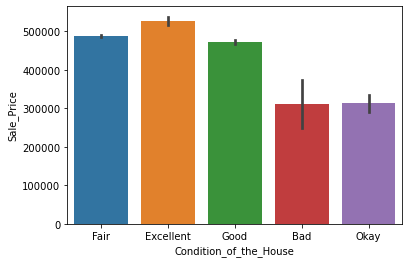

In [77]:
sns.barplot(data['Condition_of_the_House'],data['Sale_Price'])

In [78]:
mapping = {'Excellent':3,
          'Fair':2,
          'Good':2,
          'Okay':1,
          'Bad':1}

In [79]:
df['Condition_of_the_House'] = df['Condition_of_the_House'].map(mapping)

In [80]:
df['Condition_of_the_House'].value_counts()

2    19706
3     1701
1      202
Name: Condition_of_the_House, dtype: int64

<AxesSubplot:xlabel='Condition_of_the_House', ylabel='Sale_Price'>

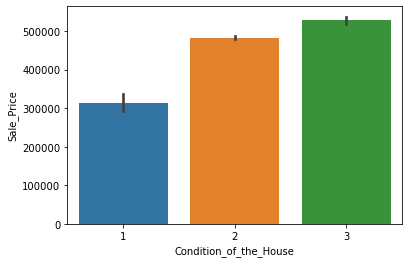

In [81]:
sns.barplot(df['Condition_of_the_House'],df['Sale_Price'])

<AxesSubplot:xlabel='Zipcode', ylabel='Sale_Price'>

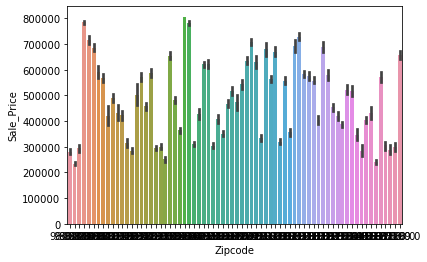

In [82]:
sns.barplot(x=data['Zipcode'],y=data['Sale_Price'])

<AxesSubplot:xlabel='Zipcode', ylabel='Count'>

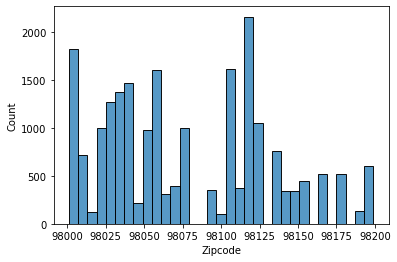

In [83]:
sns.histplot(data['Zipcode'])

In [84]:
table = df.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending=True)

In [85]:
table['Zipcode_table'] = pd.cut(table['Sale_Price'],bins=10,labels=['Zipcode_1',
                                                                   'Zipcode_2',
                                                                   'Zipcode_3',
                                                                   'Zipcode_4',
                                                                   'Zipcode_5',
                                                                    'Zipcode_6',
                                                                    'Zipcode_7',
                                                                    'Zipcode_8',
                                                                    'Zipcode_9',
                                                                    'Zipcode_10'],include_lowest=True)

In [86]:
df = pd.merge(df,table,left_on='Zipcode',how='left',right_index=True)

In [87]:
df.sample(5)

,Sale_Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No_of_Times_Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),no_of_years(house sold),is_renovated,house_is,Sale_Price_y,Zipcode_table
9859,450000.0,5,2.5,1900.0,9460.0,1.0,0,2,7,1190.0,...,98034.0,47.7096,-122.202,1940.0,8360,6,0,Middle,480593.402574,Zipcode_5
15696,450000.0,3,2.5,3800.0,13071.0,2.0,0,2,10,2730.0,...,98023.0,47.3076,-122.397,2980.0,11110,6,0,Middle,285189.182731,Zipcode_1
20986,334900.0,2,2.5,980.0,1013.0,3.0,0,2,8,980.0,...,98117.0,47.6844,-122.387,980.0,1023,5,0,New,558047.043400,Zipcode_6
18741,488000.0,2,2.0,1360.0,4688.0,1.0,0,2,7,780.0,...,98115.0,47.6874,-122.315,1340.0,4750,5,0,Old,583463.433962,Zipcode_7
16957,575000.0,3,2.5,1590.0,2910.0,2.0,0,2,7,1110.0,...,98115.0,47.6855,-122.321,1590.0,3880,5,0,Middle,583463.433962,Zipcode_7


In [88]:
df.drop('Zipcode',axis=1,inplace=True)

In [89]:
df.sample()

,Sale_Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No_of_Times_Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),...,Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),no_of_years(house sold),is_renovated,house_is,Sale_Price_y,Zipcode_table
13068,806525.0,4,4.5,3860.0,15246.0,2.0,4,2,10,2940.0,...,0,47.56,-122.161,3750.0,14790,5,0,Middle,685984.584337,Zipcode_8


In [90]:
df.dtypes

Sale_Price_x                                  float64
No of Bedrooms                                  int64
No of Bathrooms                               float64
Flat Area (in Sqft)                           float64
Lot Area (in Sqft)                            float64
No of Floors                                  float64
No_of_Times_Visited                             int64
Condition_of_the_House                          int64
Overall Grade                                   int64
Area of the House from Basement (in Sqft)     float64
Basement Area (in Sqft)                         int64
Age of House (in Years)                         int64
Renovated Year                                  int64
Latitude                                      float64
Longitude                                     float64
Living Area after Renovation (in Sqft)        float64
Lot Area after Renovation (in Sqft)             int64
no_of_years(house sold)                         int64
is_renovated                

In [91]:
df['house_is'].unique()

array(['Old', 'Middle', 'New'], dtype=object)

In [92]:
labels = {'New':0,
        'Middle':1,
         'Old':2}

In [93]:
df['house_is'] = df['house_is'].map(labels)

In [94]:
df['house_is'].unique()

array([2, 1, 0], dtype=int64)

In [95]:
df.dtypes

Sale_Price_x                                  float64
No of Bedrooms                                  int64
No of Bathrooms                               float64
Flat Area (in Sqft)                           float64
Lot Area (in Sqft)                            float64
No of Floors                                  float64
No_of_Times_Visited                             int64
Condition_of_the_House                          int64
Overall Grade                                   int64
Area of the House from Basement (in Sqft)     float64
Basement Area (in Sqft)                         int64
Age of House (in Years)                         int64
Renovated Year                                  int64
Latitude                                      float64
Longitude                                     float64
Living Area after Renovation (in Sqft)        float64
Lot Area after Renovation (in Sqft)             int64
no_of_years(house sold)                         int64
is_renovated                

In [96]:
df = pd.get_dummies(df,columns=['Zipcode_table'],drop_first=True)

In [97]:
df.sample()

,Sale_Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No_of_Times_Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),...,Sale_Price_y,Zipcode_table_Zipcode_2,Zipcode_table_Zipcode_3,Zipcode_table_Zipcode_4,Zipcode_table_Zipcode_5,Zipcode_table_Zipcode_6,Zipcode_table_Zipcode_7,Zipcode_table_Zipcode_8,Zipcode_table_Zipcode_9,Zipcode_table_Zipcode_10
15525,262000.0,4,1.5,1840.0,9009.0,2.0,0,2,7,1840.0,...,298736.560714,1,0,0,0,0,0,0,0,0


In [98]:
df.head()

,Sale_Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No_of_Times_Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),...,Sale_Price_y,Zipcode_table_Zipcode_2,Zipcode_table_Zipcode_3,Zipcode_table_Zipcode_4,Zipcode_table_Zipcode_5,Zipcode_table_Zipcode_6,Zipcode_table_Zipcode_7,Zipcode_table_Zipcode_8,Zipcode_table_Zipcode_9,Zipcode_table_Zipcode_10
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,2,7,1180.0,...,305643.767176,1,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,2,7,2170.0,...,453284.856098,0,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,2,6,770.0,...,456867.491166,0,0,1,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,3,7,1050.0,...,522748.463878,0,0,0,0,1,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,2,8,1680.0,...,635886.027211,0,0,0,0,0,0,1,0,0


In [99]:
df.drop('Sale_Price_y',axis=1,inplace=True)

In [100]:
df.sample()

,Sale_Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No_of_Times_Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),...,house_is,Zipcode_table_Zipcode_2,Zipcode_table_Zipcode_3,Zipcode_table_Zipcode_4,Zipcode_table_Zipcode_5,Zipcode_table_Zipcode_6,Zipcode_table_Zipcode_7,Zipcode_table_Zipcode_8,Zipcode_table_Zipcode_9,Zipcode_table_Zipcode_10
17026,425000.0,3,2.25,1740.0,9682.0,1.0,0,3,8,1740.0,...,1,0,0,1,0,0,0,0,0,0


In [101]:
df.dtypes

Sale_Price_x                                 float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
No_of_Times_Visited                            int64
Condition_of_the_House                         int64
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Latitude                                     float64
Longitude                                    float64
Living Area after Renovation (in Sqft)       float64
Lot Area after Renovation (in Sqft)            int64
no_of_years(house sold)                        int64
is_renovated                                  

In [102]:
x = df.drop('Sale_Price_x',axis=1)
y = df.iloc[:,0]

## calculating VIF 

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
vif_data = x

In [105]:
vif = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index = vif_data.columns)

In [106]:
vif

No of Bedrooms                                   23.059184
No of Bathrooms                                  28.928478
Flat Area (in Sqft)                            9083.703280
Lot Area (in Sqft)                                2.369883
No of Floors                                     18.086831
No_of_Times_Visited                               1.353666
Condition_of_the_House                           56.661279
Overall Grade                                   141.051380
Area of the House from Basement (in Sqft)      6831.566054
Basement Area (in Sqft)                         495.353739
Age of House (in Years)                          15.188396
Renovated Year                                16771.668935
Latitude                                     287318.294047
Longitude                                    285527.201788
Living Area after Renovation (in Sqft)           27.965464
Lot Area after Renovation (in Sqft)               2.588588
no_of_years(house sold)                         131.3746

In [107]:
def mc_remover(data):
    vif = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index = vif_data.columns)
    if vif.max()>5:
        print(vif[vif==vif.max()].index[0],'has removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print('no multicollinearity')
        return data

In [108]:
for i in range(3):
    vif_data = mc_remover(vif_data)

Latitude has removed
is_renovated has removed
Flat Area (in Sqft) has removed


In [109]:
vif_data['sale_price'] = df['Sale_Price_x']

In [110]:
vif_data.sample()

,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No_of_Times_Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Zipcode_table_Zipcode_2,Zipcode_table_Zipcode_3,Zipcode_table_Zipcode_4,Zipcode_table_Zipcode_5,Zipcode_table_Zipcode_6,Zipcode_table_Zipcode_7,Zipcode_table_Zipcode_8,Zipcode_table_Zipcode_9,Zipcode_table_Zipcode_10,sale_price
16681,4,2.25,7203.0,1.0,0,2,7,1110.0,680,45,...,0,1,0,0,0,0,0,0,0,430000.0


In [111]:
vif_data.columns

Index(['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors', 'No_of_Times_Visited', 'Condition_of_the_House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'no_of_years(house sold)',
       'house_is', 'Zipcode_table_Zipcode_2', 'Zipcode_table_Zipcode_3',
       'Zipcode_table_Zipcode_4', 'Zipcode_table_Zipcode_5',
       'Zipcode_table_Zipcode_6', 'Zipcode_table_Zipcode_7',
       'Zipcode_table_Zipcode_8', 'Zipcode_table_Zipcode_9',
       'Zipcode_table_Zipcode_10', 'sale_price'],
      dtype='object')

In [112]:
vif_data.to_csv('vif_data.csv')

In [113]:
vif_data.shape

(21609, 26)